**TWITTER SENTIMENT ANALYSIS**

Twitter Sentiment Analysis performed on a dataset of 31,962 tweets, to identify racist/sexist/negative tweets. The dataset contains the label '0' for positive tweets and the label '1' for negative tweets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Twitter-Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.shape

(31962, 3)

In [5]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**Preprocessing the Dataset**

In [8]:
#remove patterns in input text

def remove_pattern(input_txt,pattern):
  r=re.findall(pattern, input_txt)
  for word in r:
    input_txt=re.sub(word, "", input_txt)
  return input_txt

In [9]:
#remove twitter handles
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
#remove punctuation
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
#remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=stopwords.words('english')
df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
#tokenization
nltk.download('punkt')
tokenized_tweets = df.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1)
tokenized_tweets.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #, lyft, credit, use, cause, offer, w...
2                                    [bihday, majesty]
3               [#, model, love, u, take, u, time, ur]
4                 [factsguide, society, #, motivation]
dtype: object

In [13]:
#stemming
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweets=tokenized_tweets.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweets.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #, lyft, credit, use, caus, offer, whe...
2                                    [bihday, majesti]
3               [#, model, love, u, take, u, time, ur]
4                       [factsguid, societi, #, motiv]
dtype: object

In [14]:
#join tokenized tweets
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = " ".join(tokenized_tweets[i])
    
df['clean_tweet'] = tokenized_tweets
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct # run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank # lyft credit use caus offer wheelchair ...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,# model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi # motiv


**EXPLORATORY DATA ANALYSIS**

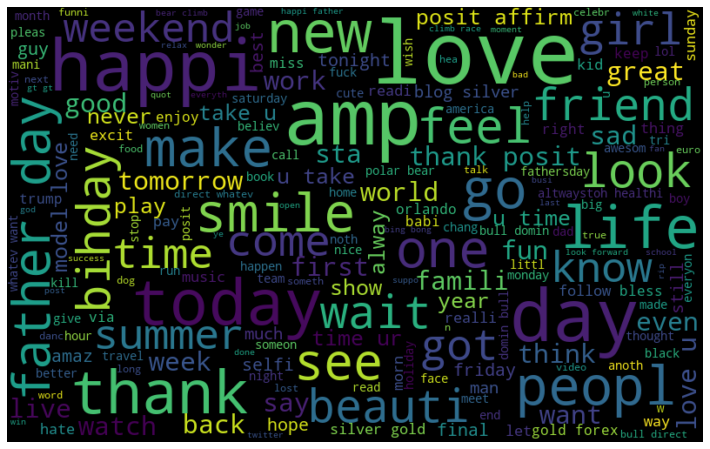

In [15]:
#visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

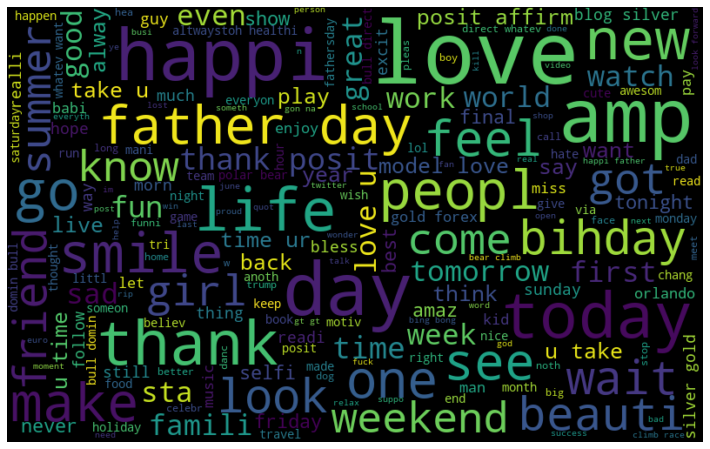

In [16]:
#visualize the positive words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

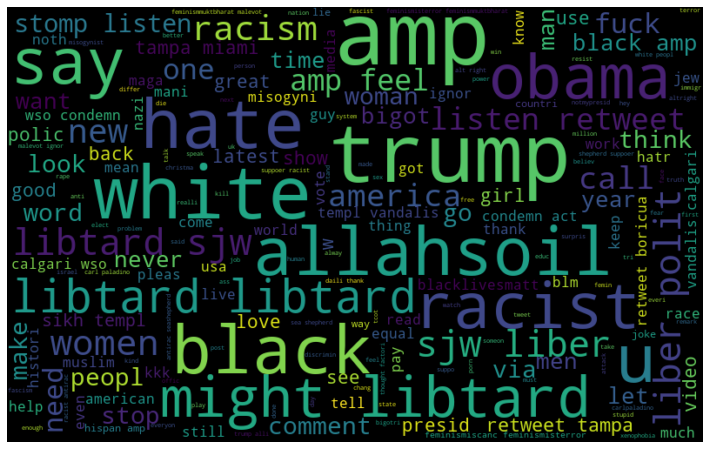

In [17]:
#visualize the negative words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Features Extraction**

In [18]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer=CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [19]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 134043 stored elements in Compressed Sparse Row format>

**Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**Training the Model**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [23]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
#testing
pred = model.predict(x_test)
f1_score(y_test,pred)

0.5100354191263283

In [25]:
accuracy_score(y_test,pred)

0.9480665748967588

In [26]:
confusion_matrix(y_test,pred)

array([[7360,   72],
       [ 343,  216]], dtype=int64)

In [27]:
#using probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1]>=0.3
pred = pred.astype(np.int)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
f1_score(y_test,pred)

0.5653021442495128

In [29]:
accuracy_score(y_test,pred)

0.9441872106119384

In [30]:
pred_prob[0][1] >= 0.3

False

In [31]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [32]:
saved_model = pickle.load(open('model.pkl', 'rb'))
saved_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)